https://blog.csdn.net/qq_43874696/article/details/123528275

In [7]:
from math import pi
import numpy as np
from roboticstoolbox import DHRobot, RevoluteDH, PrismaticDH, RevoluteMDH, PrismaticMDH


In [8]:
class MYROBOT(DHRobot):
   """
      Create model of MYROBOT manipulator
      KR5()是一个用标准DH约定对Kuka KR5机器人建模并描述其运动学特征的类。
         .
         定义的关节构型为:
         qk1，公称工作位置1
         qk2，公称工作位置2
         qk3，公称工作位置3.

      :notes:
         .使用国际计量单位米
         .包括一个11.5厘米的工具在z方向
         .

      :references:
         .
         .
         .

   """
   def __init__(self):

      deg = pi/180

      L0 = RevoluteDH(
      d=0,          # link length (Dennavit-Hartenberg notation)
      a=0,          # link offset (Dennavit-Hartenberg notation)
      alpha=pi/2,   # link twist (Dennavit-Hartenberg notation)
      I=[0, 0.35, 0, 0, 0, 0],  # inertia tensor of link with respect to
                                 # center of mass I = [L_xx, L_yy, L_zz,
                                 # L_xy, L_yz, L_xz]
      r=[0, 0, 0],  # distance of ith origin to center of mass [x,y,z]
                     # in link reference frame
      m=0,          # mass of link
      Jm=200e-6,    # actuator inertia
      G=-62.6111,   # gear ratio
      B=1.48e-3,    # actuator viscous friction coefficient (measured
                     # at the motor)
      Tc=[0.395, -0.435],  # actuator Coulomb friction coefficient for
                           # direction [-,+] (measured at the motor)
      qlim=[-160*deg, 160*deg])    # minimum and maximum joint angle

      L1 = RevoluteDH(
      d=0, a=0.4318, alpha=0,
      qlim=[-45*deg, 225*deg])
      L2 = RevoluteDH(
      d=0.15005, a=0.0203, alpha=-pi/2,
      qlim=[-225*deg, 45*deg])
      L3 = RevoluteDH(
      d=0.4318, a=0, alpha=pi/2,
      qlim=[-110*deg, 170*deg])
      L4 = RevoluteDH(
      d=0, a=0, alpha=-pi/2,
      qlim=[-100*deg, 100*deg])
      L5 = RevoluteDH(
      d=0, a=0, alpha=0,
      qlim=[-266*deg, 266*deg])


      super().__init__(
         [L0, L1, L2, L3, L4, L5],
         name="MYROBOT",
         manufacturer="COMPANY THAT BUILDS MYROBOTs")
      
      self._MYCONFIG = np.array([1, 2, 3, 4, 5, 6])  # 创建实例属性
      self.addconfiguration("qz", np.array([0,0,0,0,0,0 ]))  # 零角度，L形姿势
      self.addconfiguration("qr", np.array([0.610865,1.047198,0.785398,1.134464,0.628319,0 ]))

   @property
   def MYCONFIG(self):
      return self._MYCONFIG




In [9]:
if __name__ == '__main__':

    robot = MYROBOT()
    print(robot)
    print(robot._MYCONFIG)


DHRobot: MYROBOT (by COMPANY THAT BUILDS MYROBOTs), 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │      0 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │  -45.0° │ 225.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -225.0° │  45.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -110.0° │ 170.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬──────┬──────┬──────┬──────┬──────┬─────┐
│name │ q0   │ q1   │ q2   │ q3   │ q4   │ q5  │
├─────┼──────┼──────┼──────┼──────┼──────┼─────┤
│  qz │  0°  │  0°  │  0°  │  0°  │  0°  │  0° │
│  qr │  35° │  60° │  45° │  65° │  36° │  0° │
└─────┴──────┴──────┴──────┴──────┴──────┴─────┘

[1 2 3 4 5 6]


In [10]:
import roboticstoolbox as rtb
import numpy as np
from math import pi


In [11]:
from roboticstoolbox.models.DH.MYROBOT import MYROBOT
robot = MYROBOT()
print(robot)

DHRobot: MYROBOT (by COMPANY THAT BUILDS MYROBOTs), 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │      0 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │  -45.0° │ 225.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -225.0° │  45.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -110.0° │ 170.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬──────┬──────┬──────┬──────┬──────┬─────┐
│name │ q0   │ q1   │ q2   │ q3   │ q4   │ q5  │
├─────┼──────┼──────┼──────┼──────┼──────┼─────┤
│  qz │  0°  │  0°  │  0°  │  0°  │  0°  │  0° │
│  qr │  35° │  60° │  45° │  65° │  36° │  0° │
└─────┴──────┴──────┴──────┴──────┴──────┴─────┘



In [12]:
qt = rtb.tools.trajectory.jtraj(robot.qz, robot.qr, 50)
robot.plot(qt.q)

AttributeError: 'MYROBOT' object has no attribute 'qz'

# 官方教程


In [2]:
from spatialmath.base import *
import numpy as np
T = transl(0.5, 0.0, 0.0) @ rpy2tr(0.1, 0.2, 0.3, order='xyz') @ trotx(-90, 'deg')
print(T)

[[ 0.97517033 -0.19866933 -0.0978434   0.5       ]
 [ 0.153792    0.28962948  0.94470249  0.        ]
 [-0.15934508 -0.93629336  0.31299183  0.        ]
 [ 0.          0.          0.          1.        ]]


In [3]:
type(T)

numpy.ndarray

In [4]:
from spatialmath import *
T = SE3(0.5, 0, 0) * SE3.RPY([0.1, 0.2, 0.3], order='xyz') * SE3.Rx(-90, unit='deg') 
# 返回的不是ndarray
# np.array(T)
print(T)
print(T.eul())
print(T.R)  # rotation submatrix
print(T.t)  # translation submat


   0.9752   -0.1987   -0.09784   0.5       
   0.1538    0.2896    0.9447    0         
  -0.1593   -0.9363    0.313     0         
   0         0         0         1         

[ 1.67399895  1.25245482 -1.4022243 ]
[[ 0.97517033 -0.19866933 -0.0978434 ]
 [ 0.153792    0.28962948  0.94470249]
 [-0.15934508 -0.93629336  0.31299183]]
[0.5 0.  0. ]


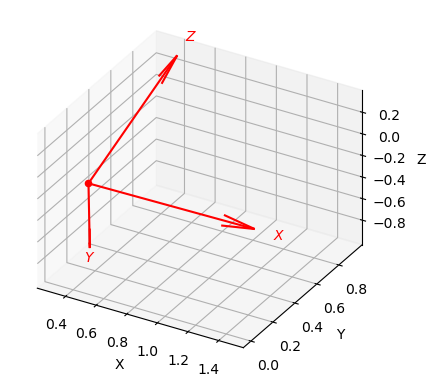

In [5]:
T.plot(color='red', label='2')

In [6]:
print(UnitQuaternion.Rx(0.3))
print(UnitQuaternion.AngVec(0.3, [1, 0, 0]))

 0.9888 <<  0.1494,  0.0000,  0.0000 >>
 0.9888 <<  0.1494,  0.0000,  0.0000 >>


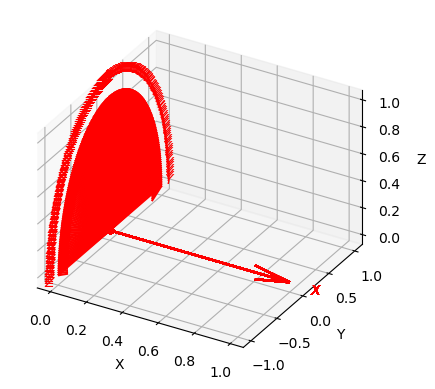

In [7]:
R = SE3.Rx(np.linspace(0, np.pi/2, num=100))
for i in range(100):
    R[i].plot(color='red', label='2')

In [8]:
# constructon
A = SE3().Rand()
A.inv()

  -0.1164   -0.9786   -0.1696    0.9992    
   0.9743   -0.1457    0.1718    0.5192    
  -0.1928   -0.1453    0.9704   -0.384     
   0         0         0         1         


In [9]:
# robot-DH
import roboticstoolbox as rtb
puma = rtb.models.DH.Puma560()
print(puma)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└─────┴─────┴──────┴──

In [10]:
puma.qr

array([ 0.        ,  1.57079633, -1.57079633,  0.        ,  0.        ,
        0.        ])

In [11]:
T = puma.fkine([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
T   # forward kinematics, 给出末端的位置

   0.1217   -0.6067   -0.7856    0.2478    
   0.8184    0.5092   -0.2665   -0.1259    
   0.5617   -0.6105    0.5584    1.146     
   0         0         0         1         


In [12]:
sol = puma.ikine_LM(T)
print(sol)

IKsolution(q=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), success=True, reason=None, iterations=12, residual=8.513679056194645e-13)


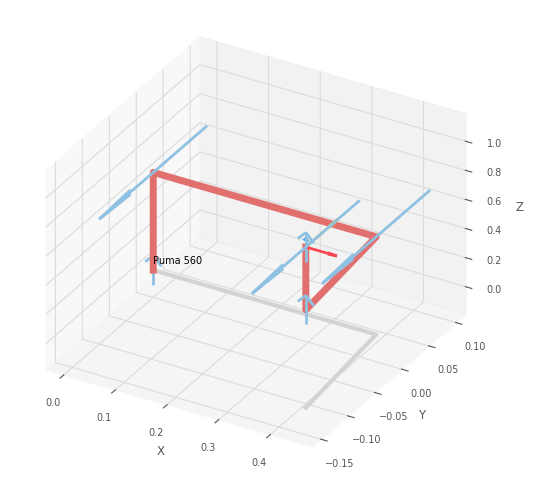

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<Figure size 640x480 with 0 Axes>

In [13]:
puma.plot([0, 0, 0, 0, 0, 0])

In [14]:
import matplotlib
print(matplotlib.get_backend())
matplotlib.use('tkagg')

module://matplotlib_inline.backend_inline


In [15]:
puma.plot([0, 0, 0, 0, 0, 0])
a = input()

In [16]:
%matplotlib qt5
# 改变后端，弹窗显示

In [17]:
puma.plot([0, 0, 0, 0, 0, 0])

PyPlot3D backend, t = 0.05, scene:
  Puma 560